# Decision Tree

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Accuracy: 0.9749
Precision: 0.9811
Recall: 0.9689
F1 Score: 0.9750
AUC: 0.9846

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97     18230
           1       0.98      0.97      0.97     18511

    accuracy                           0.97     36741
   macro avg       0.97      0.97      0.97     36741
weighted avg       0.98      0.97      0.97     36741



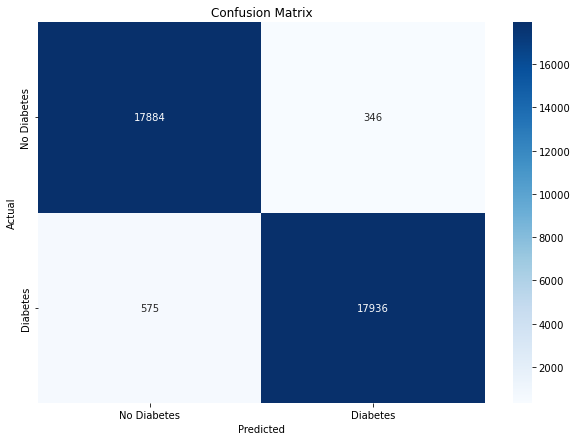

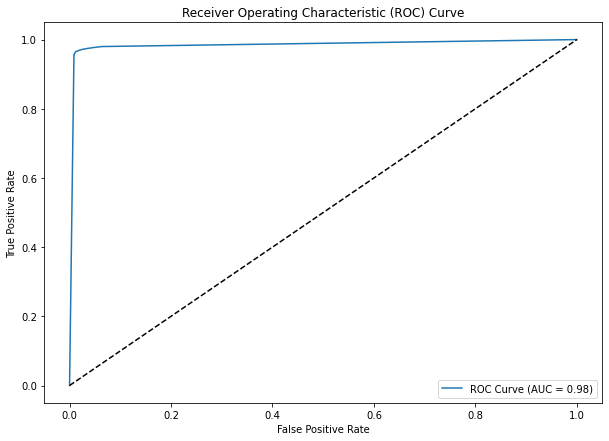

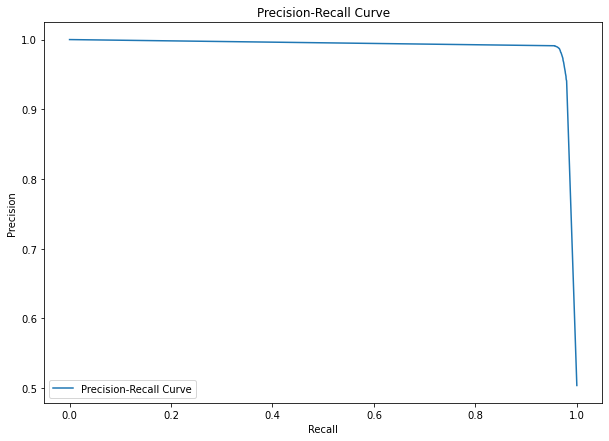

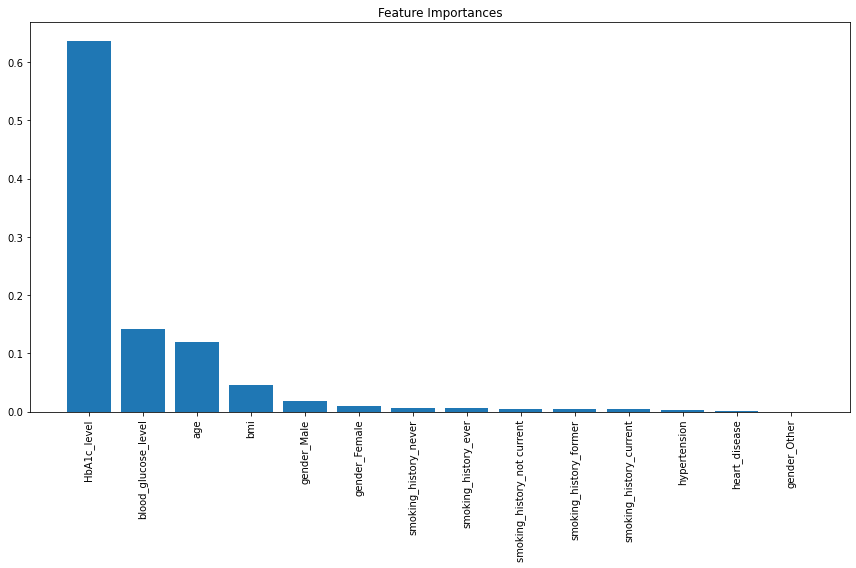

Best Parameters from GridSearchCV:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, 
                             classification_report, accuracy_score, precision_score, recall_score, f1_score)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the resampled data
file_path = "/home/user/Desktop/Gaurav/adasyn_oversampled_data.xlsx"
data = pd.read_excel(file_path)

# Assuming 'diabetes' is the target column
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Set up hyperparameters for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search with cross-validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best model from Grid Search
best_model = grid_search.best_estimator_

# Predict on test data
y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate all metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

# Print all metrics in a structured format
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision_vals, recall_vals, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot precision-recall curve
plt.figure(figsize=(10, 7))
plt.plot(recall_vals, precision_vals, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# Feature importance
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plotting feature importances
plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

# Print best parameters
print("Best Parameters from GridSearchCV: ", grid_search.best_params_)


# KNN

Accuracy: 0.9498
Precision: 0.9224
Recall: 0.9831
F1 Score: 0.9518
AUC: 0.9758

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95     18230
           1       0.92      0.98      0.95     18511

    accuracy                           0.95     36741
   macro avg       0.95      0.95      0.95     36741
weighted avg       0.95      0.95      0.95     36741



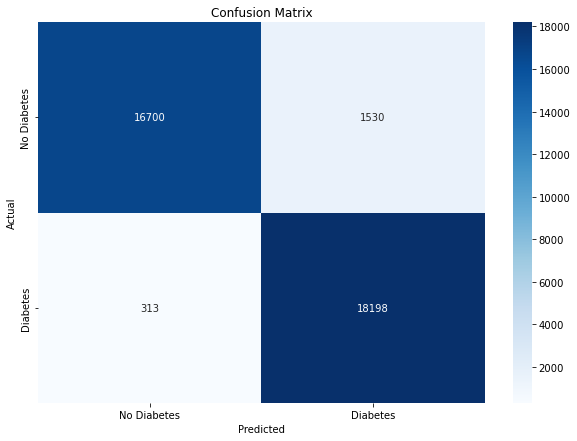

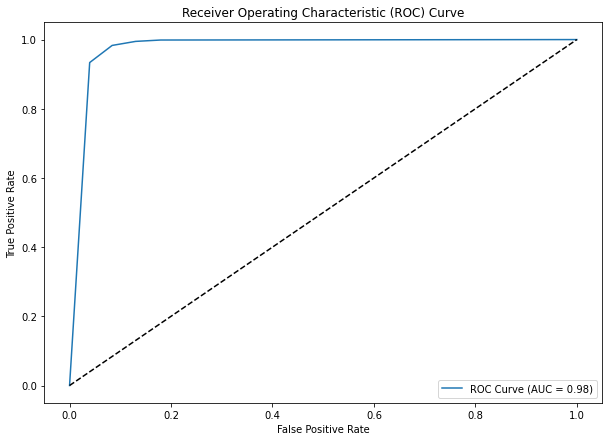

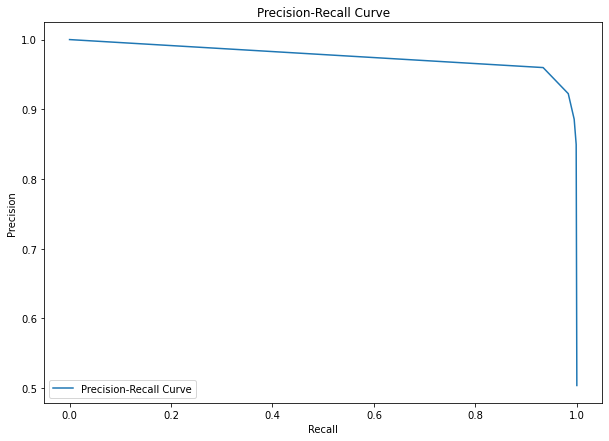

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (confusion_matrix, roc_curve, roc_auc_score, 
                             precision_recall_curve, classification_report, 
                             accuracy_score, precision_score, recall_score, f1_score)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the resampled data
file_path = "/home/user/Desktop/Gaurav/adasyn_oversampled_data.xlsx"
data = pd.read_excel(file_path)

# Assuming 'diabetes' is the target column
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize KNN Classifier with k=4
knn = KNeighborsClassifier(n_neighbors=4)

# Train the model
knn.fit(X_train, y_train)

# Predict on test data
y_pred = knn.predict(X_test)
y_pred_prob = knn.predict_proba(X_test)[:, 1]  # Predict probabilities for ROC and AUC

# Evaluate the model with additional metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

# Print all metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision_vals, recall_vals, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot precision-recall curve
plt.figure(figsize=(10, 7))
plt.plot(recall_vals, precision_vals, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# Random Forest

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Accuracy: 0.9780
Precision: 0.9834
Recall: 0.9727
F1 Score: 0.9780
AUC: 0.9971

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     18230
           1       0.98      0.97      0.98     18511

    accuracy                           0.98     36741
   macro avg       0.98      0.98      0.98     36741
weighted avg       0.98      0.98      0.98     36741



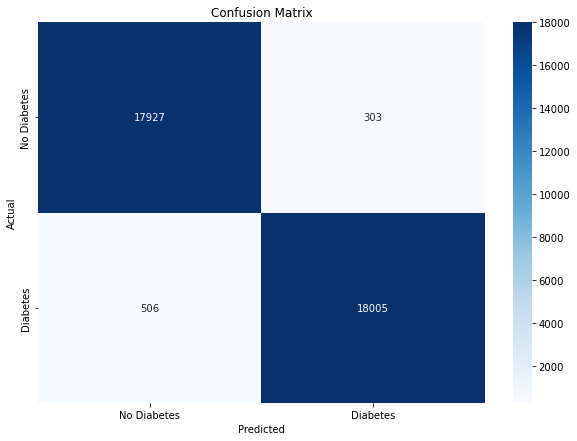

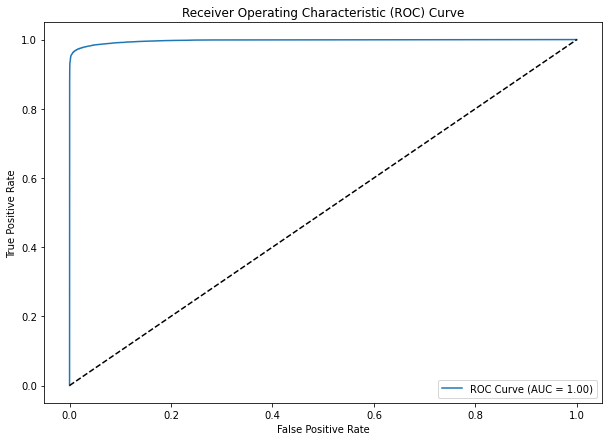

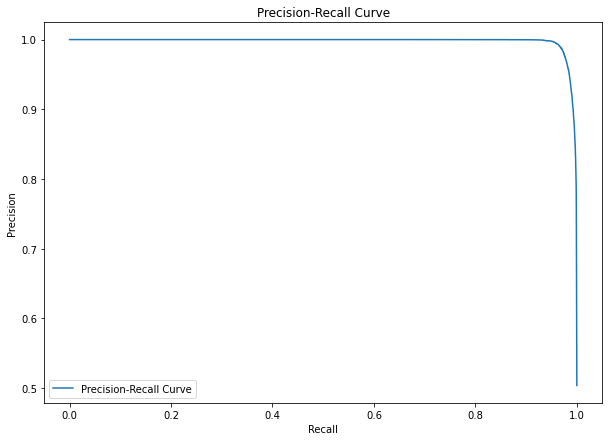

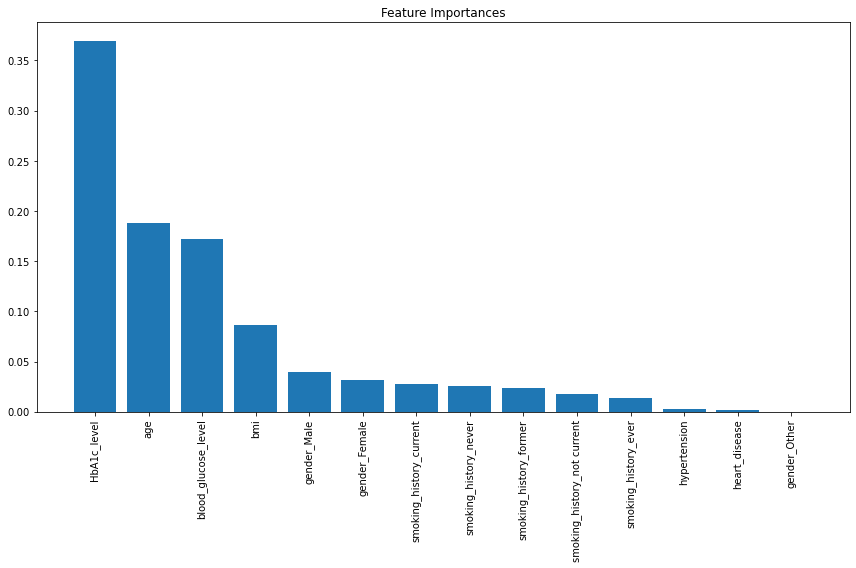

Best Parameters from GridSearchCV:  {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, roc_curve, roc_auc_score, 
                             precision_recall_curve, classification_report, 
                             accuracy_score, precision_score, recall_score, f1_score)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the resampled data
file_path = "/home/user/Desktop/Gaurav/adasyn_oversampled_data.xlsx"
data = pd.read_excel(file_path)

# Assuming 'diabetes' is the target column
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Set up hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best model from Grid Search
best_rf = grid_search.best_estimator_

# Predict on test data
y_pred = best_rf.predict(X_test)
y_pred_prob = best_rf.predict_proba(X_test)[:, 1]  # For AUC, ROC, and precision-recall curves

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision_vals, recall_vals, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot precision-recall curve
plt.figure(figsize=(10, 7))
plt.plot(recall_vals, precision_vals, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# Feature importance
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plotting feature importances
plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

# Print best parameters from GridSearchCV
print("Best Parameters from GridSearchCV: ", grid_search.best_params_)

# Logistic Regression

Accuracy: 0.9064
F1 Score: 0.9062
Precision: 0.9159
Recall: 0.8967
ROC AUC: 0.9756
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     18230
           1       0.92      0.90      0.91     18511

    accuracy                           0.91     36741
   macro avg       0.91      0.91      0.91     36741
weighted avg       0.91      0.91      0.91     36741

   Actual  Predicted
0       1          1
1       0          0
2       0          0
3       1          1
4       1          1
5       1          1
6       1          1
7       1          0
8       0          0
9       0          0


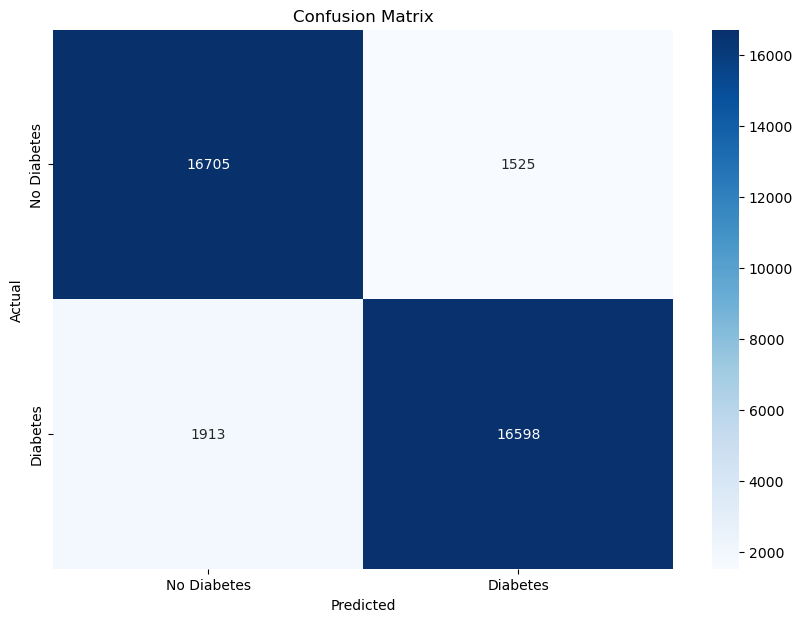

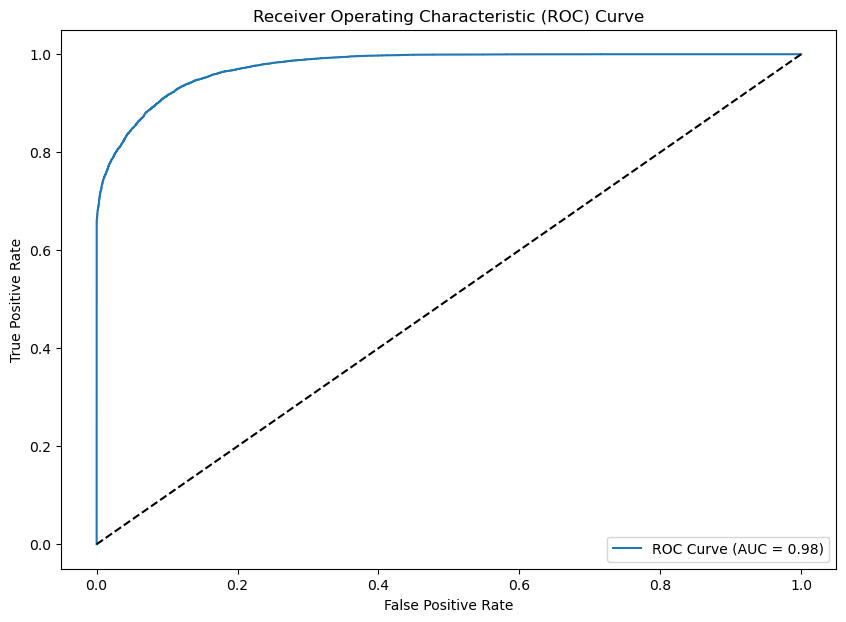

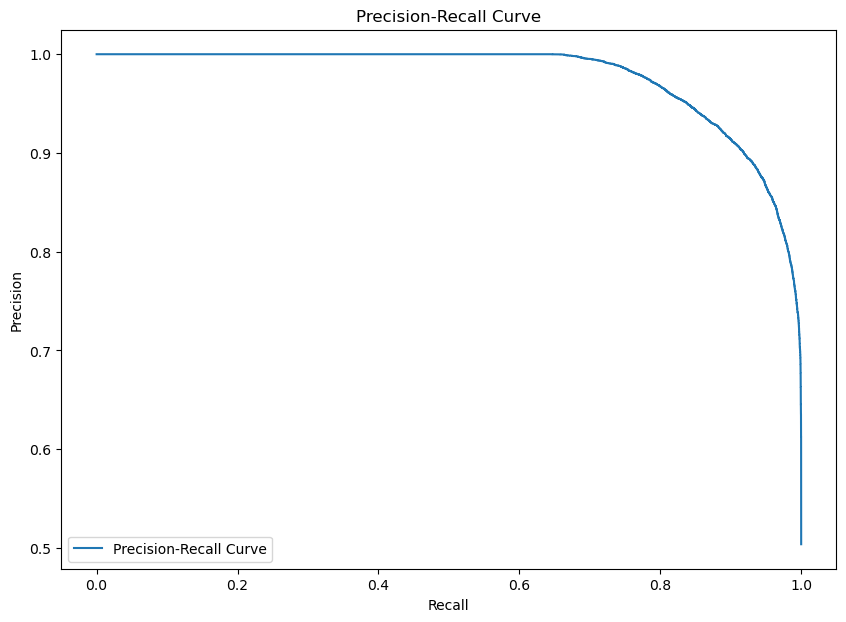

In [5]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, classification_report, accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the oversampled data
file_path = "/home/user/Desktop/Gaurav/adasyn_oversampled_data.xlsx"
data = pd.read_excel(file_path)

# Assuming 'diabetes' is the target column
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression model using cuML with increased max_iter
lr = LogisticRegression(C=1.0, fit_intercept=True, penalty='l2', tol=0.0001, max_iter=5000)
# Train the model
lr.fit(X_train, y_train)
# Predict on test data
y_pred = lr.predict(X_test)

# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Predict probabilities for ROC and AUC
y_pred_prob = lr.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print all metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(classification_report(y_test, y_pred))

# Display sample predictions
sample_indices = range(10)
sample_results = pd.DataFrame({
    'Actual': y_test.iloc[sample_indices].values,
    'Predicted': y_pred[sample_indices]
})
print(sample_results)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate and plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate and plot precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.figure(figsize=(10, 7))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# Adaboost

Accuracy: 0.9724
F1 Score: 0.9720
Precision: 0.9922
Recall: 0.9527
ROC AUC: 0.9965
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     18230
           1       0.99      0.95      0.97     18511

    accuracy                           0.97     36741
   macro avg       0.97      0.97      0.97     36741
weighted avg       0.97      0.97      0.97     36741

   Actual  Predicted
0       1          1
1       0          0
2       0          0
3       1          1
4       1          1
5       1          1
6       1          1
7       1          1
8       0          0
9       0          0


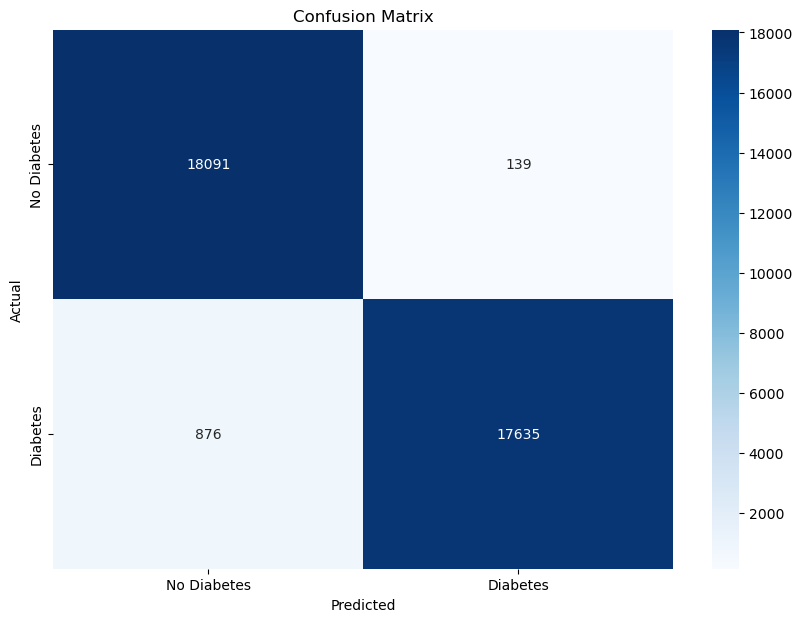

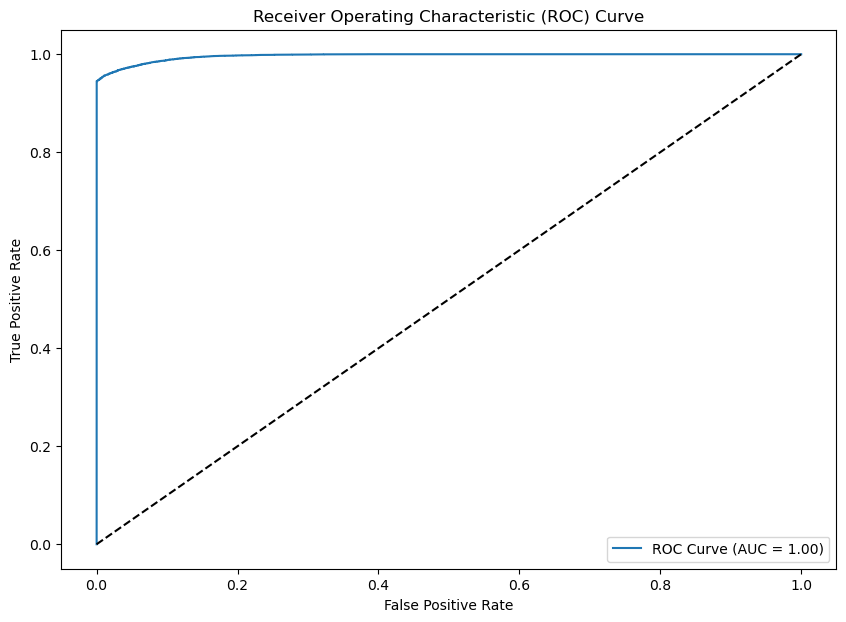

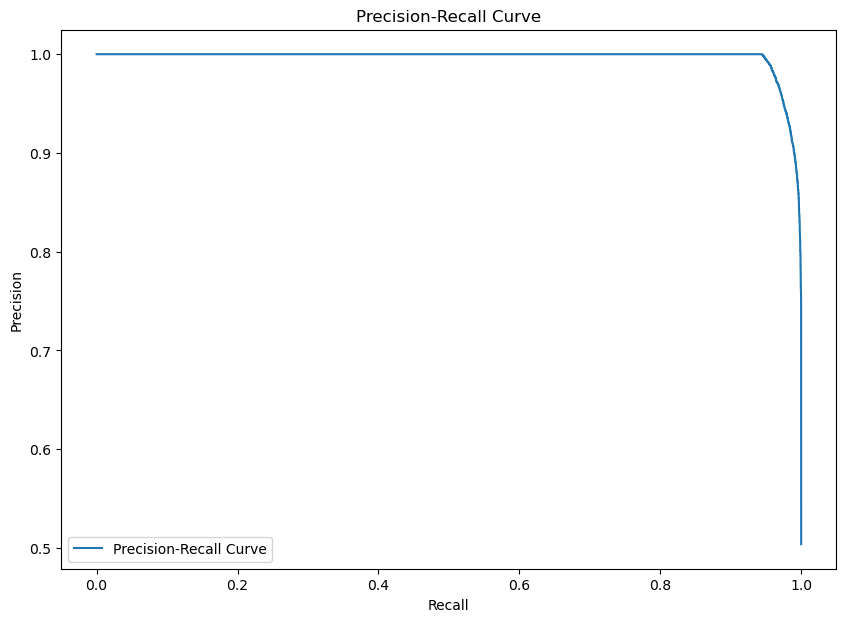

In [13]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, classification_report, accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the oversampled data
file_path = '/home/user/Desktop/Gaurav/adasyn_oversampled_data.xlsx'
data = pd.read_excel(file_path)

# Assuming 'diabetes' is the target column
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize AdaBoost Classifier (default base estimator is DecisionTreeClassifier)
ada_boost = AdaBoostClassifier(n_estimators=1000, random_state=42)

# Train the model
ada_boost.fit(X_train, y_train)

# Predict on test data
y_pred = ada_boost.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Predict probabilities for AUC and precision-recall curves
y_pred_prob = ada_boost.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print all metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(classification_report(y_test, y_pred))

# Display sample predictions
sample_indices = range(10)
sample_results = pd.DataFrame({
    'Actual': y_test.iloc[sample_indices].values,
    'Predicted': y_pred[sample_indices]
})
print(sample_results)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate and plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate and plot precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.figure(figsize=(10, 7))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# XGBoost

Accuracy: 0.9800
F1 Score: 0.9799
Precision: 0.9898
Recall: 0.9702
ROC AUC: 0.9977
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18230
           1       0.99      0.97      0.98     18511

    accuracy                           0.98     36741
   macro avg       0.98      0.98      0.98     36741
weighted avg       0.98      0.98      0.98     36741

   Actual  Predicted
0       1          1
1       0          0
2       0          0
3       1          1
4       1          1
5       1          1
6       1          1
7       1          1
8       0          0
9       0          0


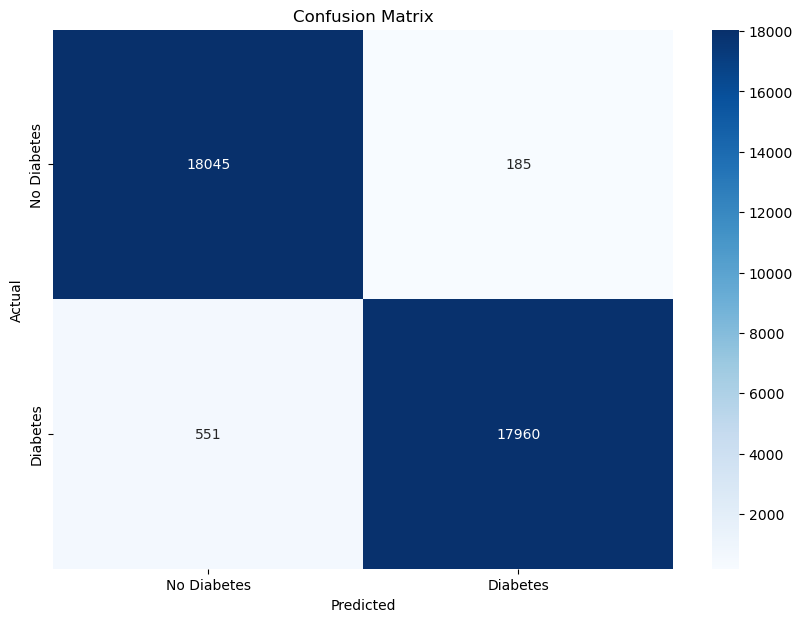

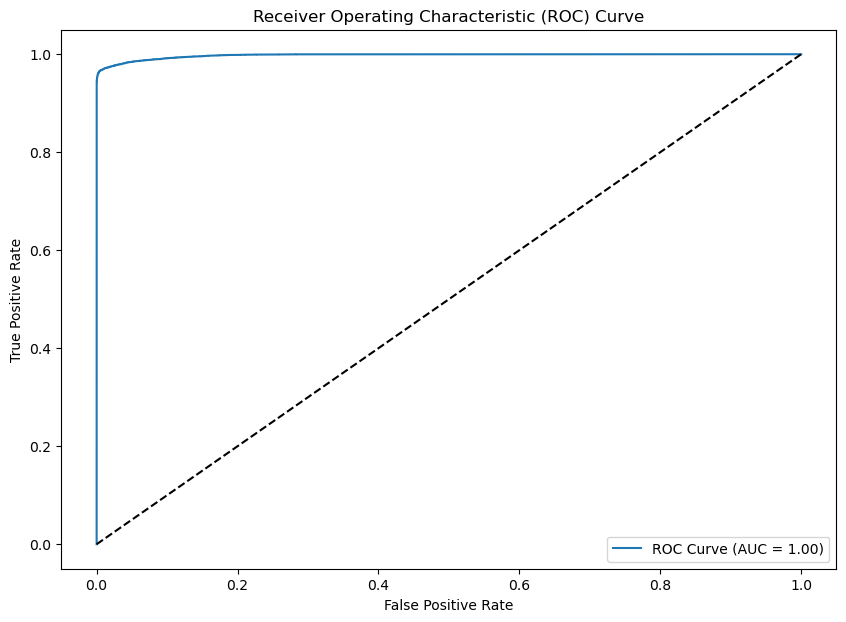

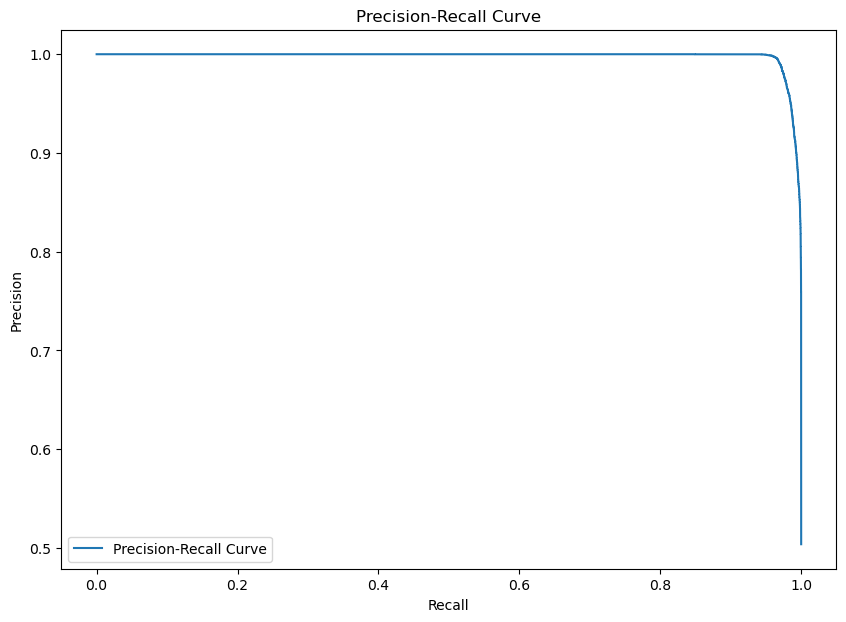

In [21]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, classification_report, accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the oversampled data
file_path = '/home/user/Desktop/Gaurav/adasyn_oversampled_data.xlsx'
data = pd.read_excel(file_path)

# Assuming 'diabetes' is the target column
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# Initialize XGBoost Classifier
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=20,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    tree_method="hist", device = "cuda"
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on test data
y_pred = xgb_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Predict probabilities for AUC and precision-recall curves
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print all metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(classification_report(y_test, y_pred))

# Display sample predictions
sample_indices = range(10)
sample_results = pd.DataFrame({
    'Actual': y_test.iloc[sample_indices].values,
    'Predicted': y_pred[sample_indices]
})
print(sample_results)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate and plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate and plot precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.figure(figsize=(10, 7))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# Voting Classifier

Accuracy: 0.9781
F1 Score: 0.9783
Precision: 0.9783
Recall: 0.9782
ROC AUC: 0.9984
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18230
           1       0.98      0.98      0.98     18511

    accuracy                           0.98     36741
   macro avg       0.98      0.98      0.98     36741
weighted avg       0.98      0.98      0.98     36741

   Actual  Predicted
0       1          1
1       0          0
2       0          0
3       1          1
4       1          1
5       1          1
6       1          1
7       1          1
8       0          0
9       0          0


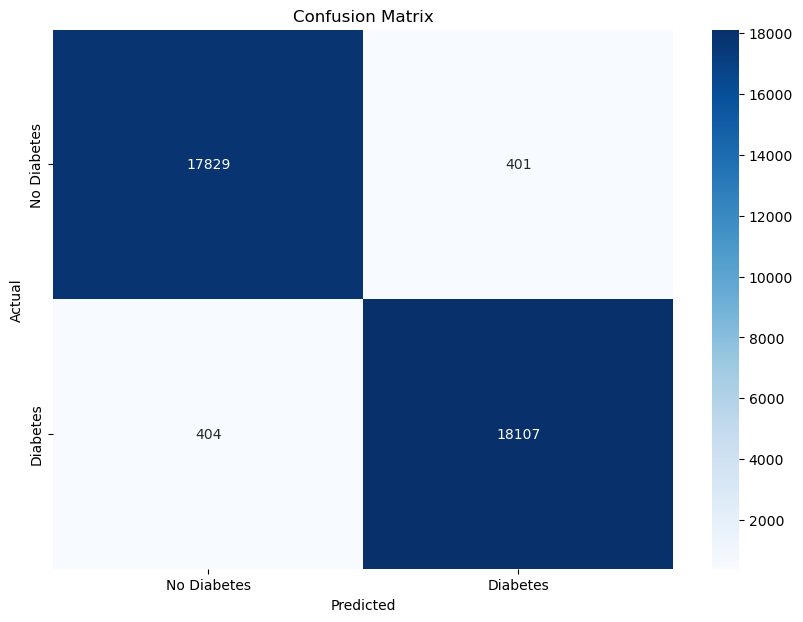

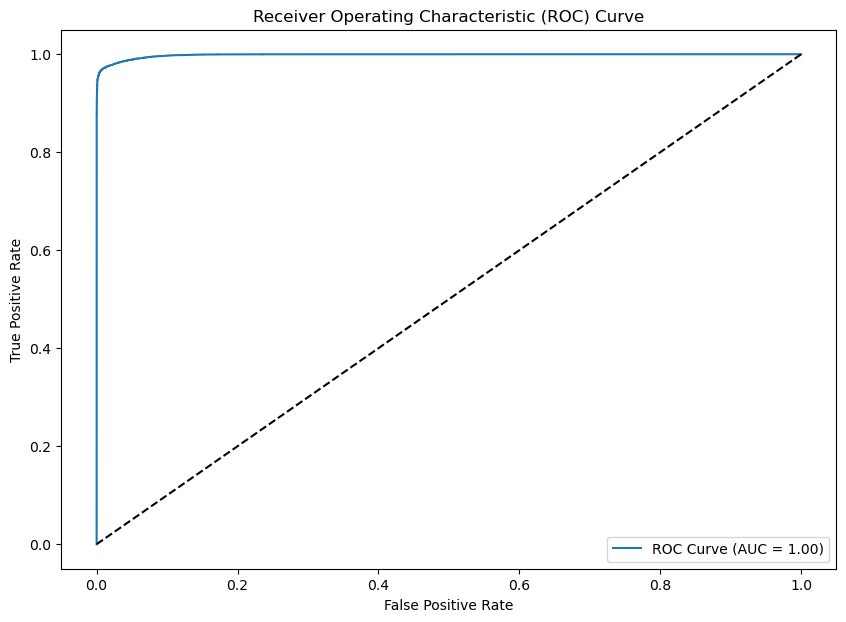

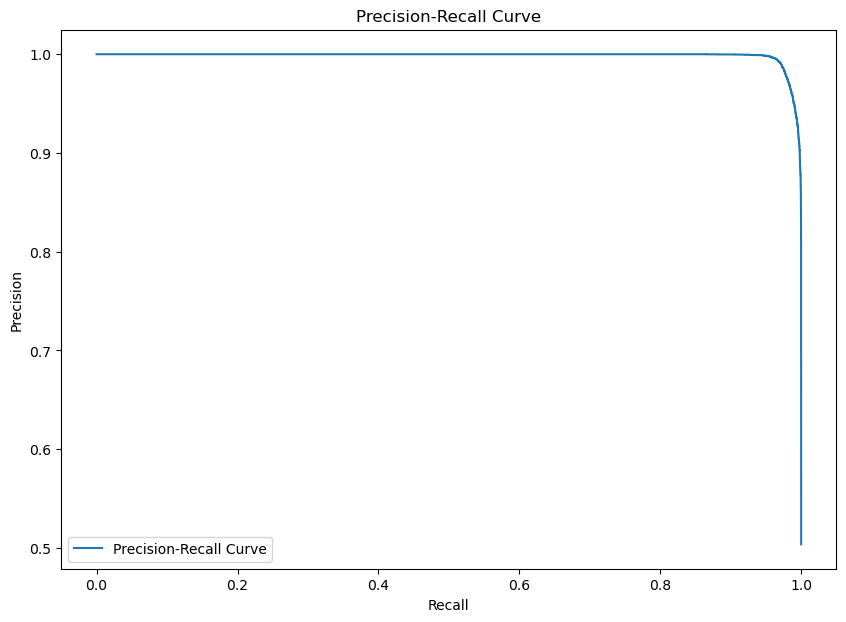

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import (confusion_matrix, roc_curve, roc_auc_score, 
                             precision_recall_curve, classification_report, 
                             accuracy_score, f1_score, precision_score, recall_score)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Load the oversampled data
file_path = '/home/user/Desktop/Gaurav/adasyn_oversampled_data.xlsx'
data = pd.read_excel(file_path)

# Assuming 'diabetes' is the target column
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize base classifiers
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier(n_neighbors=4)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=20, 
                    gamma=0, subsample=0.8, colsample_bytree=0.8, 
                    random_state=42)

# Create a Voting Classifier with soft voting
voting_clf = VotingClassifier(
    estimators=[
        ('dt', dt),
        ('knn', knn),
        ('rf', rf),
        ('xgb', xgb)
    ],
    voting='soft'
)

# Train the Voting Classifier
voting_clf.fit(X_train, y_train)

# Predict on test data
y_pred = voting_clf.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Predict probabilities for ROC curve
y_pred_prob = voting_clf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print all metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(classification_report(y_test, y_pred))

# Display sample predictions
sample_indices = range(10)
sample_results = pd.DataFrame({
    'Actual': y_test.iloc[sample_indices].values,
    'Predicted': y_pred[sample_indices]
})
print(sample_results)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate precision-recall curve
precision_curve, recall_curve, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot precision-recall curve
plt.figure(figsize=(10, 7))
plt.plot(recall_curve, precision_curve, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# Bagging

Accuracy: 0.9832
Precision: 0.9958
Recall: 0.9707
F1 Score: 0.9831
AUC: 0.9979
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18230
           1       1.00      0.97      0.98     18511

    accuracy                           0.98     36741
   macro avg       0.98      0.98      0.98     36741
weighted avg       0.98      0.98      0.98     36741

   Actual  Predicted
0       1          1
1       0          0
2       0          0
3       1          1
4       1          1
5       1          1
6       1          1
7       1          1
8       0          0
9       0          0


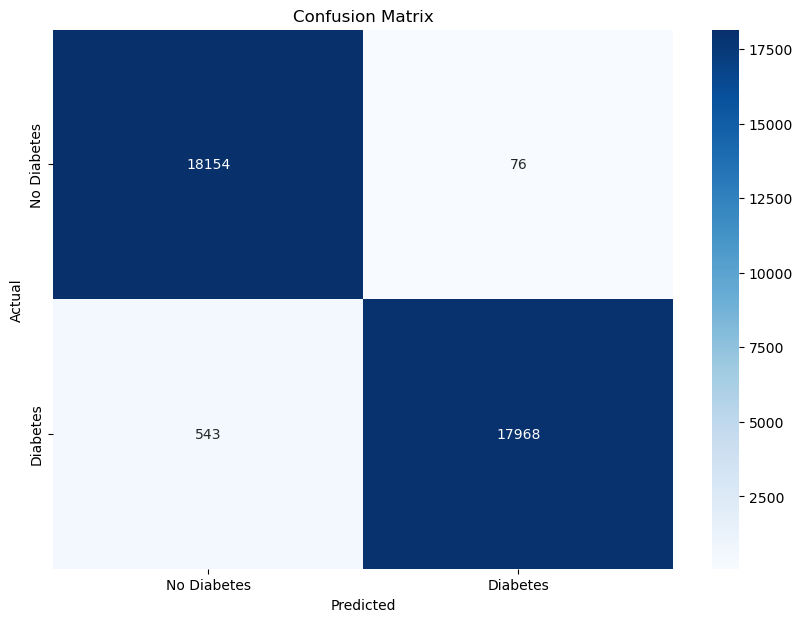

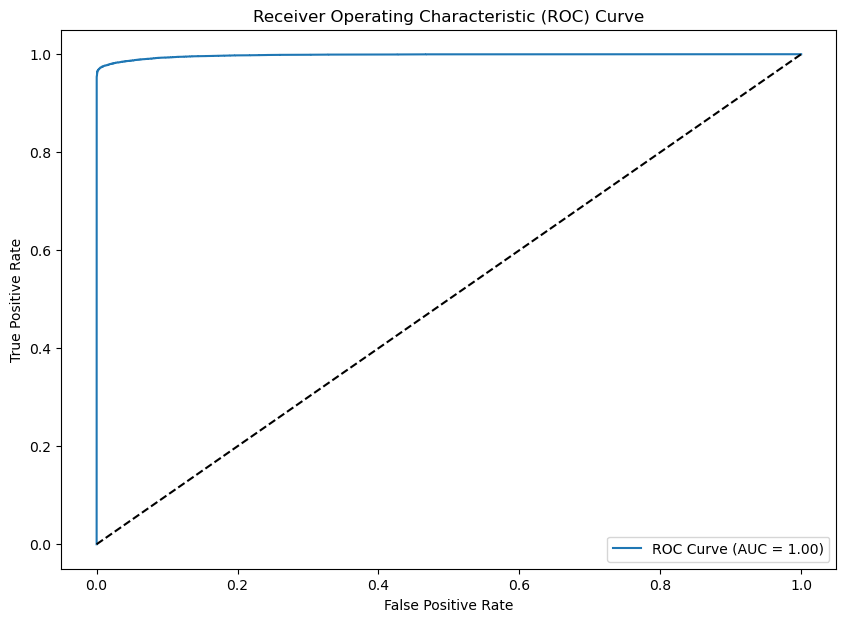

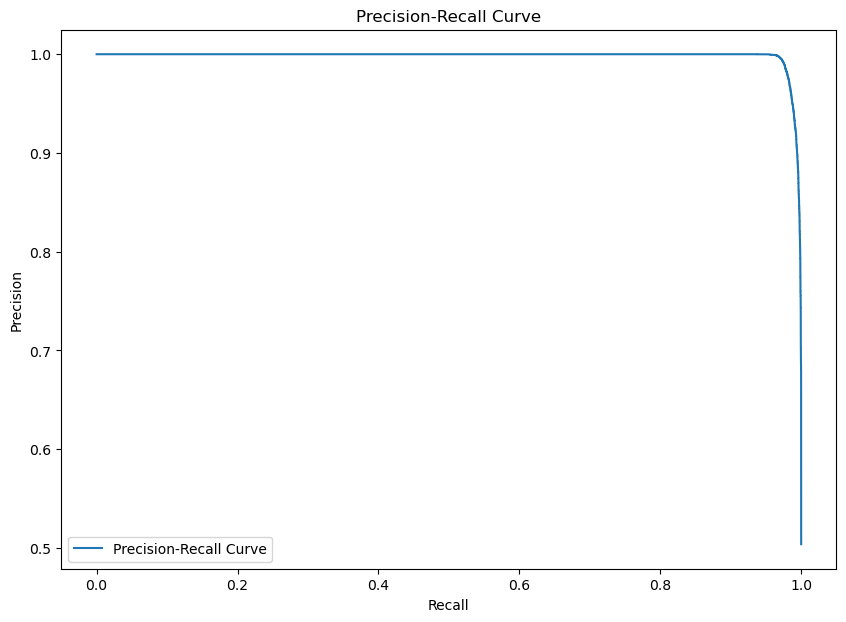

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (confusion_matrix, roc_curve, roc_auc_score, 
                             precision_recall_curve, classification_report, 
                             accuracy_score, precision_score, recall_score, f1_score)

# Load the oversampled data
file_path = '/home/user/Desktop/Gaurav/adasyn_oversampled_data.xlsx'
data = pd.read_excel(file_path)

# Assuming 'diabetes' is the target column
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Bagging Classifier using the default Decision Tree base estimator
bagging_clf = BaggingClassifier(
    n_estimators=1000,  # Number of base estimators
    max_samples=0.6,    # Fraction of samples to be used for fitting each base estimator
    max_features=0.8,   # Fraction of features to be used for fitting each base estimator
    bootstrap=True,      # Use bootstrap samples
    random_state=42
)

# Train the Bagging Classifier
bagging_clf.fit(X_train, y_train)

# Predict on test data
y_pred = bagging_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Calculate additional metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
y_pred_prob = bagging_clf.predict_proba(X_test)[:, 1]  # Predict probabilities for ROC AUC
auc = roc_auc_score(y_test, y_pred_prob)

# Display the metrics
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'AUC: {auc:.4f}')
print(classification_report(y_test, y_pred))

# Display sample predictions
sample_indices = range(10)
sample_results = pd.DataFrame({
    'Actual': y_test.iloc[sample_indices].values,
    'Predicted': y_pred[sample_indices]
})
print(sample_results)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate precision-recall curve
precision_curve, recall_curve, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot precision-recall curve
plt.figure(figsize=(10, 7))
plt.plot(recall_curve, precision_curve, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()